<a href="https://colab.research.google.com/github/niazstat/ElectionDataAnalysis/blob/main/12th_Elecetion_Data_Process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive  # Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
bronz_folder_path='/content/drive/MyDrive/Data/Bronze'
silver_folder_path='/content/drive/MyDrive/Data/Silver'
gold_folder_path = '/content/drive/MyDrive/Data/Gold'

In [ ]:
files_in_bronz_folder=[];

In [ ]:
import os

files_in_bronz_folder = os.listdir(bronz_folder_path) # collect all the file in the folder


#for file in files_in_bronz_folder:
    #print(file)

In [ ]:
df_all_seat_Name = pd.DataFrame()
for link in files_in_bronz_folder:
    if link:
        try:
          full_link=bronz_folder_path+'/'+ link
          # Read the first data row (2nd row in Excel) and first two columns
          df = pd.read_excel( full_link,nrows=1,usecols=[0, 1])

          # Append the extracted row to the main DataFrame
          df_all_seat_Name = pd.concat([df_all_seat_Name, df], ignore_index=True)

        finally:
            pass  #

In [ ]:
display(df_all_seat_Name)

,আসন নং,নির্বাচনী আসন
0,1,পঞ্চগড়-১
1,2,পঞ্চগড়-২
2,3,ঠাকুরগাঁও-১
3,4,ঠাকুরগাঁও-২
4,5,ঠাকুরগাঁও-৩
...,...,...
293,296,কক্সবাজার-৩
294,297,কক্সবাজার-৪
295,298,খাগড়াছড়ি
296,299,রাঙ্গামাটি


### Now save the data in Silver folder

In [ ]:
df_all_seat_Name.to_excel(silver_folder_path+'/'+"Seat_Names.xlsx", index=False)


##Now Collect the all Polling Center and related Inforamtion
##"আসন নং","নির্বাচনী আসন","কেন্দ্র", "মোট ভোটার","মোট বৈধ","মোট বাতিল","প্রদত্ত ভোট","শতকরা হার

In [ ]:


# Initialize an empty DataFrame to store data from all polling centers
df_all_polling_centeres = pd.DataFrame()
# Loop through all files in the 'bronz' folder
for link in files_in_bronz_folder:
    if link:
        try:
          full_link=bronz_folder_path+'/'+ link
           # Read only specific columns from the Excel file
          df = pd.read_excel(full_link,usecols=["আসন নং","নির্বাচনী আসন","কেন্দ্র", "মোট ভোটার","মোট বৈধ","মোট বাতিল","প্রদত্ত ভোট","শতকরা হার"])

          # Append the extracted row to the main DataFrame
          df_all_polling_centeres = pd.concat([df_all_polling_centeres, df], ignore_index=True)

        finally:
            pass  #

In [ ]:
display(df_all_polling_centeres)

,আসন নং,নির্বাচনী আসন,কেন্দ্র,মোট ভোটার,মোট বৈধ,মোট বাতিল,প্রদত্ত ভোট,শতকরা হার
0,1,পঞ্চগড়-১,"1 বাংলাবান্ধা সরকারী প্রাথমিক বিদ্যালয়, - (উভয়)",3697,2352,61,2413,65.27
1,1,পঞ্চগড়-১,"2 সিপাইপাড়া সরকারী প্রাথমিক বিদ্যালয়, - (উভয়)",3205,1580,48,1628,50.80
2,1,পঞ্চগড়-১,"3 ফুটকিবাড়ী সরকারী প্রাথমিক বিদ্যালয়, - (উভয়)",1770,838,0,838,47.34
3,1,পঞ্চগড়-১,"4 গোয়ালগছ সরকারী প্রাথমিক বিদ্যালয়, - (উভয়)",3487,2279,42,2321,66.56
4,1,পঞ্চগড়-১,"5 রওশনপুর সরকারী প্রাথমিক বিদ্যালয়, - (উভয়)",3047,1547,45,1592,52.25
...,...,...,...,...,...,...,...,...
41903,299,রাঙ্গামাটি,"209 ফারুয়া সরকারি প্রাথমিক বিদ্যালয়, - (উভয়)",3330,1943,21,1964,58.98
41904,299,রাঙ্গামাটি,"210 তারাছড়ি বেসরকারি প্রাথমিক বিদ্যালয়, - (উভয়)",2097,1151,23,1174,55.98
41905,299,রাঙ্গামাটি,"211 রাইমংছড়া পাড়া বে-সরকারী প্রাথমিক বিদ্যালয়,...",735,210,2,212,28.84
41906,299,রাঙ্গামাটি,"212 বড়থলি বেসরকারি প্রাথমিক বিদ্যালয়, - (উভয়)",723,324,4,328,45.37


In [ ]:
unique_centers = df_all_polling_centeres["নির্বাচনী আসন"].unique()
display(unique_centers)

array(['পঞ্চগড়-১', 'পঞ্চগড়-২', 'ঠাকুরগাঁও-১', 'ঠাকুরগাঁও-২',
       'ঠাকুরগাঁও-৩', 'দিনাজপুর-১', 'দিনাজপুর-২', 'দিনাজপুর-৩',
       'দিনাজপুর-৪', 'দিনাজপুর-৫', 'দিনাজপুর-৬', 'নীলফামারী-১',
       'নীলফামারী-২', 'নীলফামারী-৩', 'নীলফামারী-৪', 'লালমনিরহাট-১',
       'লালমনিরহাট-২', 'লালমনিরহাট-৩', 'রংপুর-১', 'রংপুর-২', 'রংপুর-৩',
       'রংপুর-৪', 'রংপুর-৫', 'রংপুর-৬', 'কুড়িগ্রাম-১', 'কুড়িগ্রাম-২',
       'কুড়িগ্রাম-৩', 'কুড়িগ্রাম-৪', 'গাইবান্ধা-১', 'গাইবান্ধা-২',
       'গাইবান্ধা-৩', 'গাইবান্ধা-৪', 'গাইবান্ধা-৫', 'জয়পুরহাট-১',
       'জয়পুরহাট-২', 'বগুড়া-১', 'বগুড়া-২', 'বগুড়া-৩', 'বগুড়া-৪',
       'বগুড়া-৫', 'বগুড়া-৬', 'বগুড়া-৭', 'চাঁপাইনবাবগঞ্জ-১',
       'চাঁপাইনবাবগঞ্জ-২', 'চাঁপাইনবাবগঞ্জ-৩', 'নওগাঁ-১', 'নওগাঁ-৩',
       'নওগাঁ-৪', 'নওগাঁ-৫', 'নওগাঁ-৬', 'রাজশাহী-১', 'রাজশাহী-২',
       'রাজশাহী-৩', 'রাজশাহী-৪', 'রাজশাহী-৫', 'রাজশাহী-৬', 'নাটোর-১',
       'নাটোর-২', 'নাটোর-৩', 'নাটোর-৪', 'সিরাজগঞ্জ-১', 'সিরাজগঞ্জ-২',
       'সিরাজগঞ্জ-৩', 'সিরাজগঞ্জ-৪', 'সিরাজগঞ্জ-৫', 'সিরাজগঞ্জ-৬',
 

## Now  All Polling Center Data (df_all_polling_centeres) in excel in silver folder

In [ ]:
df_all_polling_centeres.to_excel(silver_folder_path+'/'+"Polling_Centeres.xlsx", index=False)

## Now extract  all candidate names from the dataset, ensuring they are categorized by constituency.

In [ ]:


df_all_candidates= pd.DataFrame()
# Loop through all files in the 'bronz' folder
for link in files_in_bronz_folder:
    if link:
        try:
          full_link=bronz_folder_path+'/'+ link
          df = pd.read_excel(full_link)
          columns_to_exclude = ["কেন্দ্র", "মোট ভোটার", "মোট বৈধ", "মোট বাতিল", "প্রদত্ত ভোট", "শতকরা হার"]
          df = df.drop(columns=columns_to_exclude)
          df_melted = pd.melt(
                                    df,
                                    id_vars=["আসন নং", "নির্বাচনী আসন"],  # columns to keep fixed
                                    var_name="প্রার্থীর নাম",               # new column name for former column headers
                                    value_name="ভোট সংখ্যা"                 # new column name for the values
                                )
          df_melted = df_melted.drop( columns= ['ভোট সংখ্যা'])
          df_unique = df_melted.drop_duplicates(subset=["আসন নং", "নির্বাচনী আসন", "প্রার্থীর নাম"])



          # Append the extracted row to the main DataFrame
          df_all_candidates = pd.concat([df_all_candidates, df_unique], ignore_index=True)

        finally:
            pass  #


                  # tested for single file
                  #full_link=bronz_folder_path+'/'+ 'NPE_24_300.xlsx'
                  #df = pd.read_excel(full_link)
                  #excluded = ["কেন্দ্র", "মোট ভোটার", "মোট বৈধ", "মোট বাতিল", "প্রদত্ত ভোট", "শতকরা হার"]
                  #df = df.drop(columns=excluded)

                  #display(df)


In [ ]:

display(df_all_candidates)

,আসন নং,নির্বাচনী আসন,প্রার্থীর নাম
0,1,পঞ্চগড়-১,1.মোঃ আনোয়ার সাদাত - ট্রাক
1,1,পঞ্চগড়-১,2.মোঃ আব্দুল ওয়াদুদ (বাদশা) - একতারা
2,1,পঞ্চগড়-১,3.মোঃ আব্দুল মজিদ - ছড়ি
3,1,পঞ্চগড়-১,4.মোঃ নাঈমুজ্জামান ভুইয়াঁ - নৌকা
4,1,পঞ্চগড়-১,5.মোঃ মসিউর রহমান বাবুল - আম
...,...,...,...
1958,300,বান্দারবান,1.এ.টি. এম. শহীদুল ইসলাম - লাঙ্গল
1959,300,বান্দারবান,2.বীর বাহাদুর উ শৈ সিং - নৌকা
1960,299,রাঙ্গামাটি,1.অমর কুমার দে - ছড়ি
1961,299,রাঙ্গামাটি,2.দীপংকর তালুকদার - নৌকা


## Further processing
## form column [প্রার্থীর নাম] collect candidate ID in Symbol
## example :  from [ 1.মোঃ আনোয়ার সাদাত - ট্রাক] seperate 1 and ট্রাক  and Save to another column

In [ ]:


df_all_candidates[['প্রার্থী নং', 'প্রার্থীর নাম']] = df_all_candidates['প্রার্থীর নাম'].str.split('.', n= 1,expand=True)
df_all_candidates[['প্রার্থীর নাম', 'প্রতীক']] = df_all_candidates['প্রার্থীর নাম'].str.rsplit('-', n= 1,expand=True)
display(df_all_candidates)



,আসন নং,নির্বাচনী আসন,প্রার্থীর নাম,প্রার্থী নং,প্রতীক
0,1,পঞ্চগড়-১,মোঃ আনোয়ার সাদাত,1,ট্রাক
1,1,পঞ্চগড়-১,মোঃ আব্দুল ওয়াদুদ (বাদশা),2,একতারা
2,1,পঞ্চগড়-১,মোঃ আব্দুল মজিদ,3,ছড়ি
3,1,পঞ্চগড়-১,মোঃ নাঈমুজ্জামান ভুইয়াঁ,4,নৌকা
4,1,পঞ্চগড়-১,মোঃ মসিউর রহমান বাবুল,5,আম
...,...,...,...,...,...
1958,300,বান্দারবান,এ.টি. এম. শহীদুল ইসলাম,1,লাঙ্গল
1959,300,বান্দারবান,বীর বাহাদুর উ শৈ সিং,2,নৌকা
1960,299,রাঙ্গামাটি,অমর কুমার দে,1,ছড়ি
1961,299,রাঙ্গামাটি,দীপংকর তালুকদার,2,নৌকা


## Now Save it to Silver Folder

In [ ]:
df_all_candidates.to_excel(silver_folder_path+'/'+"All_candidates.xlsx", index=False)

In [ ]:
unique_names = df_all_candidates['প্রতীক'].unique().tolist()
print(unique_names)

[' ট্রাক', ' একতারা', ' ছড়ি', ' নৌকা', ' আম', ' টেলিভিশন', ' সোনালী আঁশ', ' লাঙ্গল', ' ঈগল', ' মিনার', ' ডাব', ' সোফা', ' কুলা', ' হাতুড়ী', ' হাত (পাঞ্জা)', ' মশাল', ' নোঙ্গর', ' বাইসাইকেল', ' কেটলি', ' মোড়া', ' হাতঘড়ি', ' কবুতর', ' কাঁচি', ' মোমবাতি', ' গোলাপ ফুল', ' চাকা', ' গামছা', ' চেয়ার', ' ফুলের মালা', ' কলার ছড়ি', ' ঢেঁকি', ' তবলা', ' বটগাছ', ' বেঞ্চ', ' ফুলকপি', ' আলমিরা', ' চার্জার লাইট ', ' বেলুন', ' মাথাল', ' মাছ', ' দোলনা', ' ফ্রিজ', ' কুঁড়েঘর', ' তরমুজ', ' রকেট', ' বাঁশি', ' উদীয়মান সূর্য', ' কাঁঠাল', ' দালান']


## Now gather the vote counts for each candidate at each polling center.

In [ ]:
df_cast_votes= pd.DataFrame()
# Loop through all files in the 'bronz' folder
for link in files_in_bronz_folder:
    if link:
        try:
          full_link=bronz_folder_path+'/'+ link
          df = pd.read_excel(full_link)
          columns_to_exclude = [ "মোট ভোটার", "মোট বৈধ", "মোট বাতিল", "প্রদত্ত ভোট", "শতকরা হার"]
          df = df.drop(columns=columns_to_exclude)
          df_melted = pd.melt(
                                    df,
                                    id_vars=["আসন নং", "নির্বাচনী আসন","কেন্দ্র"],  # columns to keep fixed
                                    var_name="প্রার্থীর নাম",               # new column name for former column headers
                                    value_name="ভোট সংখ্যা"                 # new column name for the values
                                )
          #df_melted = df_melted.drop( columns= ['ভোট সংখ্যা'])
          #df_unique = df_melted.drop_duplicates(subset=["আসন নং", "নির্বাচনী আসন", "প্রার্থীর নাম"])



          # Append the extracted row to the main DataFrame
          df_cast_votes = pd.concat([df_cast_votes, df_melted], ignore_index=True)

        finally:
            pass  #


In [ ]:
display(df_cast_votes)

,আসন নং,নির্বাচনী আসন,কেন্দ্র,প্রার্থীর নাম,ভোট সংখ্যা
0,1,পঞ্চগড়-১,"1 বাংলাবান্ধা সরকারী প্রাথমিক বিদ্যালয়, - (উভয়)",1.মোঃ আনোয়ার সাদাত - ট্রাক,356
1,1,পঞ্চগড়-১,"2 সিপাইপাড়া সরকারী প্রাথমিক বিদ্যালয়, - (উভয়)",1.মোঃ আনোয়ার সাদাত - ট্রাক,607
2,1,পঞ্চগড়-১,"3 ফুটকিবাড়ী সরকারী প্রাথমিক বিদ্যালয়, - (উভয়)",1.মোঃ আনোয়ার সাদাত - ট্রাক,328
3,1,পঞ্চগড়-১,"4 গোয়ালগছ সরকারী প্রাথমিক বিদ্যালয়, - (উভয়)",1.মোঃ আনোয়ার সাদাত - ট্রাক,533
4,1,পঞ্চগড়-১,"5 রওশনপুর সরকারী প্রাথমিক বিদ্যালয়, - (উভয়)",1.মোঃ আনোয়ার সাদাত - ট্রাক,605
...,...,...,...,...,...
277774,299,রাঙ্গামাটি,"209 ফারুয়া সরকারি প্রাথমিক বিদ্যালয়, - (উভয়)",3.মোঃ মিজানুর রহমান - সোনালী আঁশ,47
277775,299,রাঙ্গামাটি,"210 তারাছড়ি বেসরকারি প্রাথমিক বিদ্যালয়, - (উভয়)",3.মোঃ মিজানুর রহমান - সোনালী আঁশ,41
277776,299,রাঙ্গামাটি,"211 রাইমংছড়া পাড়া বে-সরকারী প্রাথমিক বিদ্যালয়,...",3.মোঃ মিজানুর রহমান - সোনালী আঁশ,1
277777,299,রাঙ্গামাটি,"212 বড়থলি বেসরকারি প্রাথমিক বিদ্যালয়, - (উভয়)",3.মোঃ মিজানুর রহমান - সোনালী আঁশ,29


## Now Extract Cndidate ID and Polling Center ID

In [ ]:
df_cast_votes[['প্রার্থী নং', 'প্রার্থীর নাম']] = df_cast_votes['প্রার্থীর নাম'].str.split('.', n= 1,expand=True)
df_cast_votes[['কেন্দ্র নং', 'কেন্দ্র']] = df_cast_votes['কেন্দ্র'].str.split(' ', n= 1,expand=True)

display(df_cast_votes)

,আসন নং,নির্বাচনী আসন,কেন্দ্র,প্রার্থীর নাম,ভোট সংখ্যা,প্রার্থী নং,কেন্দ্র নং
0,1,পঞ্চগড়-১,"বাংলাবান্ধা সরকারী প্রাথমিক বিদ্যালয়, - (উভয়)",মোঃ আনোয়ার সাদাত - ট্রাক,356,1,1
1,1,পঞ্চগড়-১,"সিপাইপাড়া সরকারী প্রাথমিক বিদ্যালয়, - (উভয়)",মোঃ আনোয়ার সাদাত - ট্রাক,607,1,2
2,1,পঞ্চগড়-১,"ফুটকিবাড়ী সরকারী প্রাথমিক বিদ্যালয়, - (উভয়)",মোঃ আনোয়ার সাদাত - ট্রাক,328,1,3
3,1,পঞ্চগড়-১,"গোয়ালগছ সরকারী প্রাথমিক বিদ্যালয়, - (উভয়)",মোঃ আনোয়ার সাদাত - ট্রাক,533,1,4
4,1,পঞ্চগড়-১,"রওশনপুর সরকারী প্রাথমিক বিদ্যালয়, - (উভয়)",মোঃ আনোয়ার সাদাত - ট্রাক,605,1,5
...,...,...,...,...,...,...,...
277774,299,রাঙ্গামাটি,"ফারুয়া সরকারি প্রাথমিক বিদ্যালয়, - (উভয়)",মোঃ মিজানুর রহমান - সোনালী আঁশ,47,3,209
277775,299,রাঙ্গামাটি,"তারাছড়ি বেসরকারি প্রাথমিক বিদ্যালয়, - (উভয়)",মোঃ মিজানুর রহমান - সোনালী আঁশ,41,3,210
277776,299,রাঙ্গামাটি,"রাইমংছড়া পাড়া বে-সরকারী প্রাথমিক বিদ্যালয়, - (...",মোঃ মিজানুর রহমান - সোনালী আঁশ,1,3,211
277777,299,রাঙ্গামাটি,"বড়থলি বেসরকারি প্রাথমিক বিদ্যালয়, - (উভয়)",মোঃ মিজানুর রহমান - সোনালী আঁশ,29,3,212


#Now Save  cast_votes  in silver folder

In [ ]:
df_cast_votes.to_excel(silver_folder_path+'/'+"cast_votes.xlsx", index=False)


# Data Consolidation Summary

We have now consolidated all data into four files from the raw sources:

## 📄 Seat_Names.xlsx  
## 📄 Polling_Centeres.xlsx  
## 📄 All_candidates.xlsx  
## 📄 Cast_votes.xlsx  

## Final Processing and Modeling Stage

In [6]:
df_seats= pd.read_excel(silver_folder_path+'/'+"Seat_Names.xlsx")

display(df_seats)

,আসন নং,নির্বাচনী আসন
0,1,পঞ্চগড়-১
1,2,পঞ্চগড়-২
2,3,ঠাকুরগাঁও-১
3,4,ঠাকুরগাঁও-২
4,5,ঠাকুরগাঁও-৩
...,...,...
293,296,কক্সবাজার-৩
294,297,কক্সবাজার-৪
295,298,খাগড়াছড়ি
296,299,রাঙ্গামাটি


## Finally move this file to gold folder

In [7]:
df_seats.to_excel(gold_folder_path+'/'+"Seat_Names.xlsx", index=False)

## Now Check All Candidates file

In [18]:
df_candidates= pd.read_excel(silver_folder_path+'/'+"All_candidates.xlsx")

display(df_candidates)



,আসন নং,নির্বাচনী আসন,প্রার্থীর নাম,প্রার্থী নং,প্রতীক
0,1,পঞ্চগড়-১,মোঃ আনোয়ার সাদাত,1,ট্রাক
1,1,পঞ্চগড়-১,মোঃ আব্দুল ওয়াদুদ (বাদশা),2,একতারা
2,1,পঞ্চগড়-১,মোঃ আব্দুল মজিদ,3,ছড়ি
3,1,পঞ্চগড়-১,মোঃ নাঈমুজ্জামান ভুইয়াঁ,4,নৌকা
4,1,পঞ্চগড়-১,মোঃ মসিউর রহমান বাবুল,5,আম
...,...,...,...,...,...
1958,300,বান্দারবান,এ.টি. এম. শহীদুল ইসলাম,1,লাঙ্গল
1959,300,বান্দারবান,বীর বাহাদুর উ শৈ সিং,2,নৌকা
1960,299,রাঙ্গামাটি,অমর কুমার দে,1,ছড়ি
1961,299,রাঙ্গামাটি,দীপংকর তালুকদার,2,নৌকা


##The column “নির্বাচনী আসন” is redundant and can be removed.

In [19]:
df_candidates = df_candidates.drop(columns=['নির্বাচনী আসন'])

df_candidates = df_candidates[['আসন নং', 'প্রার্থী নং', 'প্রার্থীর নাম', 'প্রতীক']]   # Rearrange COlumn Order

display(df_candidates)

,আসন নং,প্রার্থী নং,প্রার্থীর নাম,প্রতীক
0,1,1,মোঃ আনোয়ার সাদাত,ট্রাক
1,1,2,মোঃ আব্দুল ওয়াদুদ (বাদশা),একতারা
2,1,3,মোঃ আব্দুল মজিদ,ছড়ি
3,1,4,মোঃ নাঈমুজ্জামান ভুইয়াঁ,নৌকা
4,1,5,মোঃ মসিউর রহমান বাবুল,আম
...,...,...,...,...
1958,300,1,এ.টি. এম. শহীদুল ইসলাম,লাঙ্গল
1959,300,2,বীর বাহাদুর উ শৈ সিং,নৌকা
1960,299,1,অমর কুমার দে,ছড়ি
1961,299,2,দীপংকর তালুকদার,নৌকা


#### Here, the columns 'আসন নং' and 'প্রার্থী নং' together form the composite key

In [20]:


duplicates = df_candidates.duplicated(subset=['আসন নং', 'প্রার্থী নং']) # check duplicate  ,,
df_candidates[duplicates]

,আসন নং,প্রার্থী নং,প্রার্থীর নাম,প্রতীক


## Finally Save it to Gold Folder

In [21]:
df_candidates.to_excel(gold_folder_path+'/'+"all_candidates.xlsx", index=False)

## Now Check the Polling_Centeres.xlsx File

In [22]:
df_poling_centres= pd.read_excel(silver_folder_path+'/'+"Polling_Centeres.xlsx")

display(df_poling_centres)

,আসন নং,নির্বাচনী আসন,কেন্দ্র,মোট ভোটার,মোট বৈধ,মোট বাতিল,প্রদত্ত ভোট,শতকরা হার
0,1,পঞ্চগড়-১,"1 বাংলাবান্ধা সরকারী প্রাথমিক বিদ্যালয়, - (উভয়)",3697,2352,61,2413,65.27
1,1,পঞ্চগড়-১,"2 সিপাইপাড়া সরকারী প্রাথমিক বিদ্যালয়, - (উভয়)",3205,1580,48,1628,50.80
2,1,পঞ্চগড়-১,"3 ফুটকিবাড়ী সরকারী প্রাথমিক বিদ্যালয়, - (উভয়)",1770,838,0,838,47.34
3,1,পঞ্চগড়-১,"4 গোয়ালগছ সরকারী প্রাথমিক বিদ্যালয়, - (উভয়)",3487,2279,42,2321,66.56
4,1,পঞ্চগড়-১,"5 রওশনপুর সরকারী প্রাথমিক বিদ্যালয়, - (উভয়)",3047,1547,45,1592,52.25
...,...,...,...,...,...,...,...,...
41903,299,রাঙ্গামাটি,"209 ফারুয়া সরকারি প্রাথমিক বিদ্যালয়, - (উভয়)",3330,1943,21,1964,58.98
41904,299,রাঙ্গামাটি,"210 তারাছড়ি বেসরকারি প্রাথমিক বিদ্যালয়, - (উভয়)",2097,1151,23,1174,55.98
41905,299,রাঙ্গামাটি,"211 রাইমংছড়া পাড়া বে-সরকারী প্রাথমিক বিদ্যালয়,...",735,210,2,212,28.84
41906,299,রাঙ্গামাটি,"212 বড়থলি বেসরকারি প্রাথমিক বিদ্যালয়, - (উভয়)",723,324,4,328,45.37


In [23]:
df_poling_centres = df_poling_centres.drop(columns=['নির্বাচনী আসন']) #The column “নির্বাচনী আসন” is redundant and can be removed.

display(df_poling_centres)



,আসন নং,কেন্দ্র,মোট ভোটার,মোট বৈধ,মোট বাতিল,প্রদত্ত ভোট,শতকরা হার
0,1,"1 বাংলাবান্ধা সরকারী প্রাথমিক বিদ্যালয়, - (উভয়)",3697,2352,61,2413,65.27
1,1,"2 সিপাইপাড়া সরকারী প্রাথমিক বিদ্যালয়, - (উভয়)",3205,1580,48,1628,50.80
2,1,"3 ফুটকিবাড়ী সরকারী প্রাথমিক বিদ্যালয়, - (উভয়)",1770,838,0,838,47.34
3,1,"4 গোয়ালগছ সরকারী প্রাথমিক বিদ্যালয়, - (উভয়)",3487,2279,42,2321,66.56
4,1,"5 রওশনপুর সরকারী প্রাথমিক বিদ্যালয়, - (উভয়)",3047,1547,45,1592,52.25
...,...,...,...,...,...,...,...
41903,299,"209 ফারুয়া সরকারি প্রাথমিক বিদ্যালয়, - (উভয়)",3330,1943,21,1964,58.98
41904,299,"210 তারাছড়ি বেসরকারি প্রাথমিক বিদ্যালয়, - (উভয়)",2097,1151,23,1174,55.98
41905,299,"211 রাইমংছড়া পাড়া বে-সরকারী প্রাথমিক বিদ্যালয়,...",735,210,2,212,28.84
41906,299,"212 বড়থলি বেসরকারি প্রাথমিক বিদ্যালয়, - (উভয়)",723,324,4,328,45.37


## In the 'কেন্দ্র' column, (1 বাংলাবান্ধা সরকারী প্রাথমিক বিদ্যালয়, - (উভয়)	)extract the leading number and store it in a separate column

In [29]:
# Extract the first part (before the first space) into 'কেন্দ্র নং'
df_poling_centres['কেন্দ্র নং'] = df_poling_centres['কেন্দ্র'].str.split(' ').str[0]

# Extract everything after the first space into 'কেন্দ্র'
df_poling_centres['কেন্দ্র'] = df_poling_centres['কেন্দ্র'].str.split(' ', n=1).str[1]  #' ' → separator (space)  #n=1 → split at first occurrence only #.str[1] → take everything after the first space

display(df_poling_centres)



,আসন নং,কেন্দ্র,মোট ভোটার,মোট বৈধ,মোট বাতিল,প্রদত্ত ভোট,শতকরা হার,কেন্দ্র নং
0,1,"বাংলাবান্ধা সরকারী প্রাথমিক বিদ্যালয়, - (উভয়)",3697,2352,61,2413,65.27,1
1,1,"সিপাইপাড়া সরকারী প্রাথমিক বিদ্যালয়, - (উভয়)",3205,1580,48,1628,50.80,2
2,1,"ফুটকিবাড়ী সরকারী প্রাথমিক বিদ্যালয়, - (উভয়)",1770,838,0,838,47.34,3
3,1,"গোয়ালগছ সরকারী প্রাথমিক বিদ্যালয়, - (উভয়)",3487,2279,42,2321,66.56,4
4,1,"রওশনপুর সরকারী প্রাথমিক বিদ্যালয়, - (উভয়)",3047,1547,45,1592,52.25,5
...,...,...,...,...,...,...,...,...
41903,299,"ফারুয়া সরকারি প্রাথমিক বিদ্যালয়, - (উভয়)",3330,1943,21,1964,58.98,209
41904,299,"তারাছড়ি বেসরকারি প্রাথমিক বিদ্যালয়, - (উভয়)",2097,1151,23,1174,55.98,210
41905,299,"রাইমংছড়া পাড়া বে-সরকারী প্রাথমিক বিদ্যালয়, - (...",735,210,2,212,28.84,211
41906,299,"বড়থলি বেসরকারি প্রাথমিক বিদ্যালয়, - (উভয়)",723,324,4,328,45.37,212


In [30]:

df_poling_centres = df_poling_centres[['আসন নং', 'কেন্দ্র নং', 'কেন্দ্র', 'মোট ভোটার','মোট বৈধ','মোট বাতিল','প্রদত্ত ভোট','শতকরা হার']]   # Rearrange COlumn Order
display(df_poling_centres)

,আসন নং,কেন্দ্র নং,কেন্দ্র,মোট ভোটার,মোট বৈধ,মোট বাতিল,প্রদত্ত ভোট,শতকরা হার
0,1,1,"বাংলাবান্ধা সরকারী প্রাথমিক বিদ্যালয়, - (উভয়)",3697,2352,61,2413,65.27
1,1,2,"সিপাইপাড়া সরকারী প্রাথমিক বিদ্যালয়, - (উভয়)",3205,1580,48,1628,50.80
2,1,3,"ফুটকিবাড়ী সরকারী প্রাথমিক বিদ্যালয়, - (উভয়)",1770,838,0,838,47.34
3,1,4,"গোয়ালগছ সরকারী প্রাথমিক বিদ্যালয়, - (উভয়)",3487,2279,42,2321,66.56
4,1,5,"রওশনপুর সরকারী প্রাথমিক বিদ্যালয়, - (উভয়)",3047,1547,45,1592,52.25
...,...,...,...,...,...,...,...,...
41903,299,209,"ফারুয়া সরকারি প্রাথমিক বিদ্যালয়, - (উভয়)",3330,1943,21,1964,58.98
41904,299,210,"তারাছড়ি বেসরকারি প্রাথমিক বিদ্যালয়, - (উভয়)",2097,1151,23,1174,55.98
41905,299,211,"রাইমংছড়া পাড়া বে-সরকারী প্রাথমিক বিদ্যালয়, - (...",735,210,2,212,28.84
41906,299,212,"বড়থলি বেসরকারি প্রাথমিক বিদ্যালয়, - (উভয়)",723,324,4,328,45.37


### Here, the columns 'আসন নং' and 'কেন্দ্র নং' together form the composite key

In [32]:
duplicates = df_poling_centres.duplicated(subset=['আসন নং', 'কেন্দ্র নং']) # check duplicate  ,,
df_poling_centres[duplicates]

,আসন নং,কেন্দ্র নং,কেন্দ্র,মোট ভোটার,মোট বৈধ,মোট বাতিল,প্রদত্ত ভোট,শতকরা হার


# Finally Save it to Gold Folder

In [33]:
df_poling_centres.to_excel(gold_folder_path+'/'+"polling_centeres.xlsx", index=False)

## Now Check Cast_votes.xlsx File for Redundant Data

In [34]:
df_cast_votes= pd.read_excel(silver_folder_path+'/'+"cast_votes.xlsx")

display(df_cast_votes )

,আসন নং,নির্বাচনী আসন,কেন্দ্র,প্রার্থীর নাম,ভোট সংখ্যা,প্রার্থী নং,কেন্দ্র নং
0,1,পঞ্চগড়-১,"বাংলাবান্ধা সরকারী প্রাথমিক বিদ্যালয়, - (উভয়)",মোঃ আনোয়ার সাদাত - ট্রাক,356,1,1
1,1,পঞ্চগড়-১,"সিপাইপাড়া সরকারী প্রাথমিক বিদ্যালয়, - (উভয়)",মোঃ আনোয়ার সাদাত - ট্রাক,607,1,2
2,1,পঞ্চগড়-১,"ফুটকিবাড়ী সরকারী প্রাথমিক বিদ্যালয়, - (উভয়)",মোঃ আনোয়ার সাদাত - ট্রাক,328,1,3
3,1,পঞ্চগড়-১,"গোয়ালগছ সরকারী প্রাথমিক বিদ্যালয়, - (উভয়)",মোঃ আনোয়ার সাদাত - ট্রাক,533,1,4
4,1,পঞ্চগড়-১,"রওশনপুর সরকারী প্রাথমিক বিদ্যালয়, - (উভয়)",মোঃ আনোয়ার সাদাত - ট্রাক,605,1,5
...,...,...,...,...,...,...,...
277774,299,রাঙ্গামাটি,"ফারুয়া সরকারি প্রাথমিক বিদ্যালয়, - (উভয়)",মোঃ মিজানুর রহমান - সোনালী আঁশ,47,3,209
277775,299,রাঙ্গামাটি,"তারাছড়ি বেসরকারি প্রাথমিক বিদ্যালয়, - (উভয়)",মোঃ মিজানুর রহমান - সোনালী আঁশ,41,3,210
277776,299,রাঙ্গামাটি,"রাইমংছড়া পাড়া বে-সরকারী প্রাথমিক বিদ্যালয়, - (...",মোঃ মিজানুর রহমান - সোনালী আঁশ,1,3,211
277777,299,রাঙ্গামাটি,"বড়থলি বেসরকারি প্রাথমিক বিদ্যালয়, - (উভয়)",মোঃ মিজানুর রহমান - সোনালী আঁশ,29,3,212


## Remove Redundant Columns

##The columns **‘নির্বাচনী আসন’**, **‘কেন্দ্র’**, and **‘প্রার্থীর নাম’** are redundant and can be removed.

In [35]:
df_cast_votes = df_cast_votes.drop(columns=['নির্বাচনী আসন','কেন্দ্র','প্রার্থীর নাম']) #The column  'নির্বাচনী আসন','কেন্দ্র','প্রার্থীর নাম' is redundant and can be removed.

display(df_cast_votes)

,আসন নং,ভোট সংখ্যা,প্রার্থী নং,কেন্দ্র নং
0,1,356,1,1
1,1,607,1,2
2,1,328,1,3
3,1,533,1,4
4,1,605,1,5
...,...,...,...,...
277774,299,47,3,209
277775,299,41,3,210
277776,299,1,3,211
277777,299,29,3,212


# Re arrange the column

In [36]:
df_cast_votes = df_cast_votes[['আসন নং', 'কেন্দ্র নং', 'প্রার্থী নং', 'ভোট সংখ্যা']]   # Rearrange COlumn Order
display(df_cast_votes)

,আসন নং,কেন্দ্র নং,প্রার্থী নং,ভোট সংখ্যা
0,1,1,1,356
1,1,2,1,607
2,1,3,1,328
3,1,4,1,533
4,1,5,1,605
...,...,...,...,...
277774,299,209,3,47
277775,299,210,3,41
277776,299,211,3,1
277777,299,212,3,29


#Here, the columns 'আসন নং', 'কেন্দ্র নং','প্রার্থী নং'  together form the composite key

In [38]:
duplicates = df_cast_votes.duplicated(subset=['আসন নং', 'কেন্দ্র নং','প্রার্থী নং']) # check duplicate  ,,
df_cast_votes[duplicates]

,আসন নং,কেন্দ্র নং,প্রার্থী নং,ভোট সংখ্যা


# finally save it to Gold Folder

In [39]:
df_cast_votes.to_excel(gold_folder_path+'/'+"cast_votes.xlsx", index=False)

# --- Data Collection, Preprocessing, and Modeling Finished.  
# Proceed to Data Analysis in a separate file.

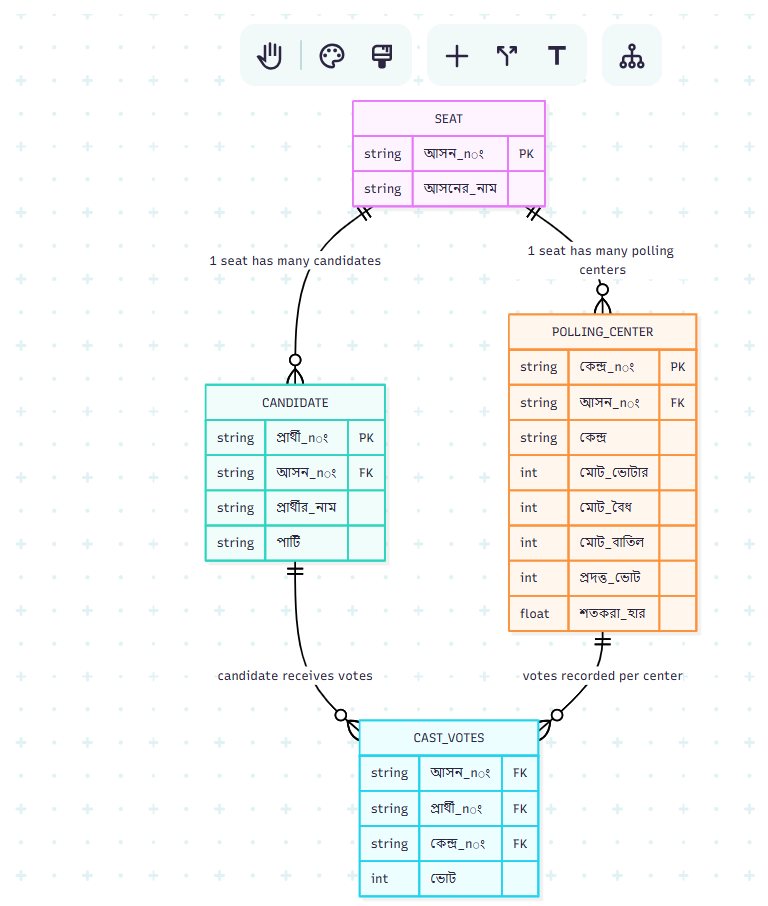

In [44]:
df_cast_votes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277779 entries, 0 to 277778
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   আসন নং       277779 non-null  int64
 1   কেন্দ্র নং   277779 non-null  int64
 2   প্রার্থী নং  277779 non-null  int64
 3   ভোট সংখ্যা   277779 non-null  int64
dtypes: int64(4)
memory usage: 8.5 MB
